<a href="https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_11/TG11_2341720056_Rizkya_Salsabila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1 - Klasifikasi SVM dengan Data Dummy Linier

## Langkah 1 - Import Library

In [4]:
# Library untuk perhitungan numerik dan manipulasi array/matriks
import numpy as np

# Library untuk visualisasi statistik yang berbasis matplotlib
import seaborn as sns

# Library untuk membuat grafik dan plot 2D
import matplotlib.pyplot as plt

# Modul untuk analisis statistik dan fungsi distribusi probabilitas
from scipy import stats

## Langkah 2 - Membuat Data Dummy

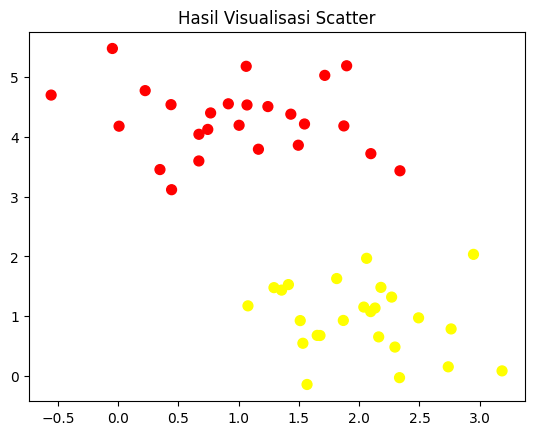

In [5]:
# Import fungsi untuk membuat dataset sintetis berbasis cluster
from sklearn.datasets import make_blobs

# Membuat dataset sintetis dengan ,  standar deviasi cluster 0.60, dan
X, y = make_blobs(
    n_samples=50,   # 50 sampel
    centers=2,      # 2 cluster
    random_state=0, # seed random 0
    cluster_std=0.60
)

# Memberi judul pada plot
plt.title("Hasil Visualisasi Scatter")

# Membuat scatter plot, warna sesuai label y, ukuran titik 50, colormap 'autumn'
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Menampilkan plot
plt.show()

## Langkah 3 - Buat Ilustrasi Garis Pemisah

## Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

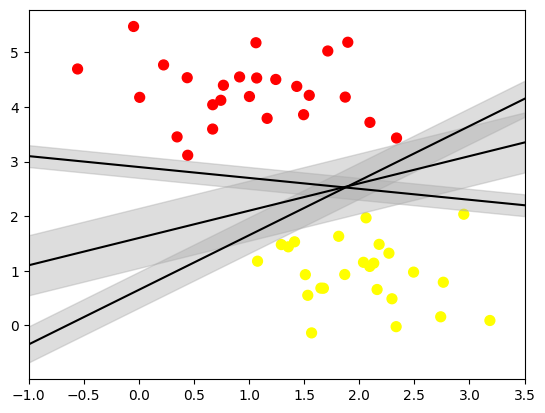

In [6]:
# membuat array xfit untuk sumbu x dari -1 hingga 3.5
xfit = np.linspace(-1, 3.5)

# membuat sactter plot dataset, warna sesuai label y, ukuran titik 50, colormap 'autumn
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# loop untuk menggambar garis dan area bayangan untuk beberapa parameter slope, intercept, dan deviasi
for m, b, d, in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  # menghitung nilai y sesuai garis y = m*x + b
  yfit = m * xfit + b
  # menggambar garis hitam
  plt.plot(xfit, yfit, '-k')
  # mengisi area bayangan di sekitar garis dari yfit-d hingga yfit+d
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

# menentukan batas sumbu x dari -1 hingga 3.5
plt.xlim(-1, 3.5)

## Langkah 5 - Fitting Model

### 1. Pelatihan terhadap model SVM

In [7]:
from sklearn.svm import SVC     # SVC kepanjangan dari support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### 2. Visualisasi hasil fit model

In [8]:
# fungsi untuk menampilkan fitting data
def plot_svc_decision_function(model, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
  # mengambil batas sumbu x
  xlim = ax.get_xlim()
  # mengambil batas sumbu y
  ylim = ax.get_ylim()

  # grid untuk evaluasi model
  # membuat 30 titik antara batas x
  x = np.linspace(xlim[0], xlim[1], 30)
  # membuat 30 titik antara batas y
  y = np.linspace(ylim[0], ylim[1], 30)
  # membuat grid 2D dari titik - titik x dan y
  Y, X = np.meshgrid(y, x)
  # menggabungkan pasangan x dan y
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  # menghitung nilai keputusan SVM untuk grid
  P = model.decision_function(xy).reshape(X.shape)

  # plot batas margin
  ax.contour(X, Y, P, colors='k',
             levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--', '-', '--'])

  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

### 3. Hasil Plotting

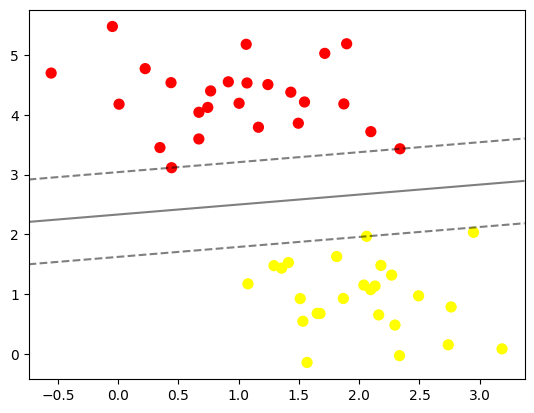

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

### 4. Data yang masuk di Support Vector

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### 5. Perbandingan data awal 60 VS 120

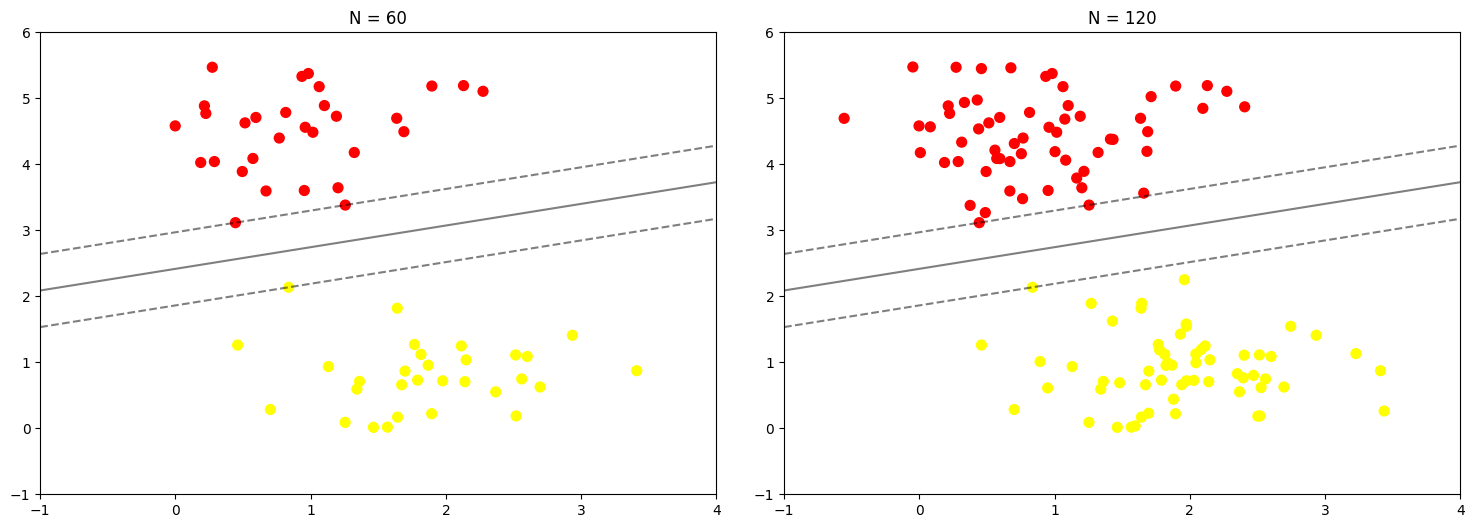

In [11]:
def plot_svm(N=10, ax=None):
  # make_blobs untuk membuat data x dan y secara acak tapi membentuk cluster
  X, y = make_blobs(
      # menentukan jumlah total data
      n_samples=200,
      # membuat dataset 2 cluster
      centers=2,
      # agar tidak berubah tiap data dijalankan
      random_state=0,
      # untuk mengatur penyebaran data tiap cluster
      cluster_std=0.60
  )

  # mengambil N data pertama
  X = X[:N]
  # mengambil label sesuai jumlah data
  y = y[:N]
  # membuat SVM linear dengan regulasi besar
  model = SVC(kernel='linear', C=1E10)
  # melatih model dengan data
  model.fit(X, y)

  # menggunakan axes aktif jika tidak disediakan
  ax = ax or plt.gca()
  # menampilkan titik data dengan warna berbeda per kelas
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  # mengatur batas sumbu x
  ax.set_xlim(-1, 4)
  # mengatur batas sumbu y
  ax.set_ylim(-1, 6)
  # menampilkan garis batas keputusan dan margin SVM
  plot_svc_decision_function(model, ax)

# membuat 2 plot dalam satu baris
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# mengatur jarak antar subplot
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# melakukan perulangan untuk nilai N 60 dan 120
for axi, N in zip(ax, [60, 120]):
  # memanggil fungsi plot untuk tiap subplot
  plot_svm(N, axi)
  # memberikan judul sesuai jumlah data yang digunakan
  axi.set_title('N = {0}'.format(N))

### 6. Pemfilteran banyaknya data yang diinginkan

In [12]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00


In [13]:
# mengimpor library untuk elemen interaktif
from ipywidgets import interact, fixed
# menentukan banyaknya N untuk pemfilteran
interact(plot_svm, N=[10, 50, 100, 150, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 150, 200), value=10), Output()), _dom_cl…

<function __main__.plot_svm(N=10, ax=None)>

# PRAKTIKUM 2

## Langkah 1 - Ilustrasi Data Non Linier

### Langkah 1a - Import Library

In [20]:
# untuk operasi numerik
import numpy as np
# untuk visualisasi data
import matplotlib.pyplot as plt
# untuk grafik yang lebih menarik
import seaborn as sns
# untuk fungsi statistik
from scipy import stats
# untuk model Support Vector Classifier dari scikit learn
from sklearn.svm import SVC

### Langkah 1b - Membuat Kembali Fungsi Plotting

In [18]:

# membuat sebuah fungsi untuk menampilkan fitting data
def plot_svc_decision_function(model, ax=None, plot_support=True):

  if ax is None:
    # menggunakan axis aktif jika tidak diberikan
    ax = plt.gca()
  # menyimpan batas sumbu x
  xlim = ax.get_xlim()
  # menyimpan batas sumbu y
  ylim = ax.get_ylim()

  # -- membuat grid untuk evaluasi model --
  # membuat 30 titik pada sumbu x
  x = np.linspace(xlim[0], xlim[1], 30)
  # membuat 30 titik pada sumbu y
  y = np.linspace(ylim[0], ylim[1], 30)
  # membentuk grid 2D dari titik x dan y
  Y, X = np.meshgrid(y, x)
  # menggabungkan koordinat menjadi pasangan
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  # menghitung fungsi keputusan SVM di setiap titik grid
  P = model.decision_function(xy).reshape(x.shape)

  # plot batas dan margin
  ax.contour(
      X, Y, P, colors='k',
      levels=[-1, 0, 1], alpha=0.5,
      # menampilkan garis batas
      linestyles=['--', '-', '--']
  )

  # plot support vectors
  if plot_support:
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300,
        linewidth=1,
        facecolors='none'
    );

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 1c - Membuat Data Dummy Non Linier

ValueError: cannot reshape array of size 900 into shape (30,)

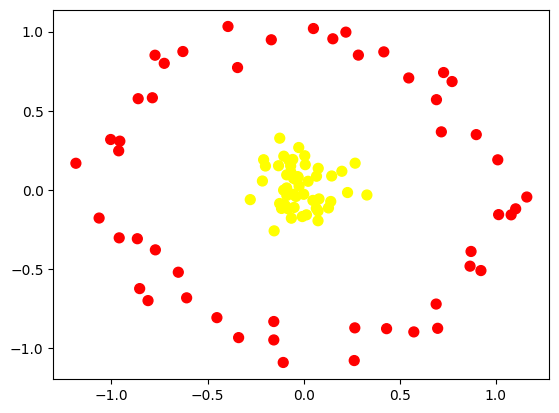

In [19]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);